<a href="https://colab.research.google.com/github/VikaSvyat/DI_Bootcamp/blob/main/colab/Miniproject2_Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Red and White Wine.zip to Red and White Wine.zip


In [7]:
!ls

'Red and White Wine.zip'  'Wine Quality dataset'
 sample_data		  'Wine Quality dataset.zip'


In [9]:
#!unzip "Wine Quality dataset.zip"
!unzip "Red and White Wine.zip"

Archive:  Red and White Wine.zip
  inflating: Red and White Wine/wine-quality-white-and-red.csv  


In [6]:
# === IMPORTS ===
# pandas, numpy, seaborn, matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# sklearn preprocessing tools: StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.preprocessing import StandardScaler

# sklearn imputer: SimpleImputer
from sklearn.impute import SimpleImputer

In [12]:
df = pd.read_csv("Wine Quality dataset/winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
wine = pd.read_csv("Red and White Wine/wine-quality-white-and-red.csv")
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [13]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [14]:
wine.shape
wine.info()
wine.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


***Check for and handle missing values (e.g., using dropna() or fillna()) and detect outliers using techniques like IQR or z-scores.***

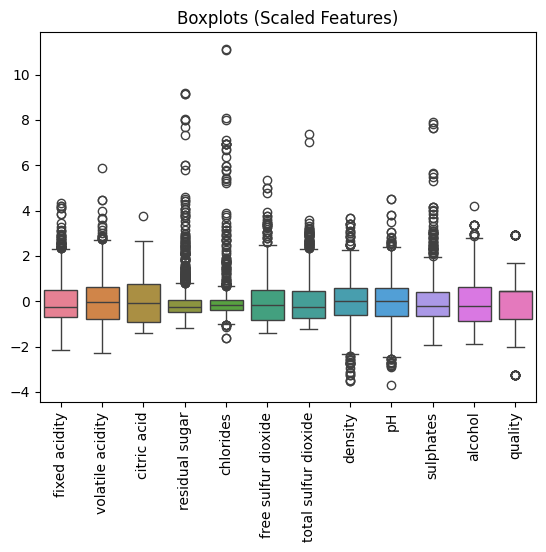

Box plots show the full distribution: median, quartiles, and outliers.


In [20]:
# Box plot with hue: Body mass by species AND sex
numeric_df = df.select_dtypes(include='number')

scaled = StandardScaler().fit_transform(numeric_df)
scaled_df = pd.DataFrame(scaled, columns=numeric_df.columns)

sns.boxplot(data=scaled_df)
plt.xticks(rotation=90)
plt.title('Boxplots (Scaled Features)')
plt.show()

print("Box plots show the full distribution: median, quartiles, and outliers.")

***Examine the distribution of continuous variables (e.g., using histograms or boxplots) and transform variables with high skew (e.g., using log transformations) if necessary.***

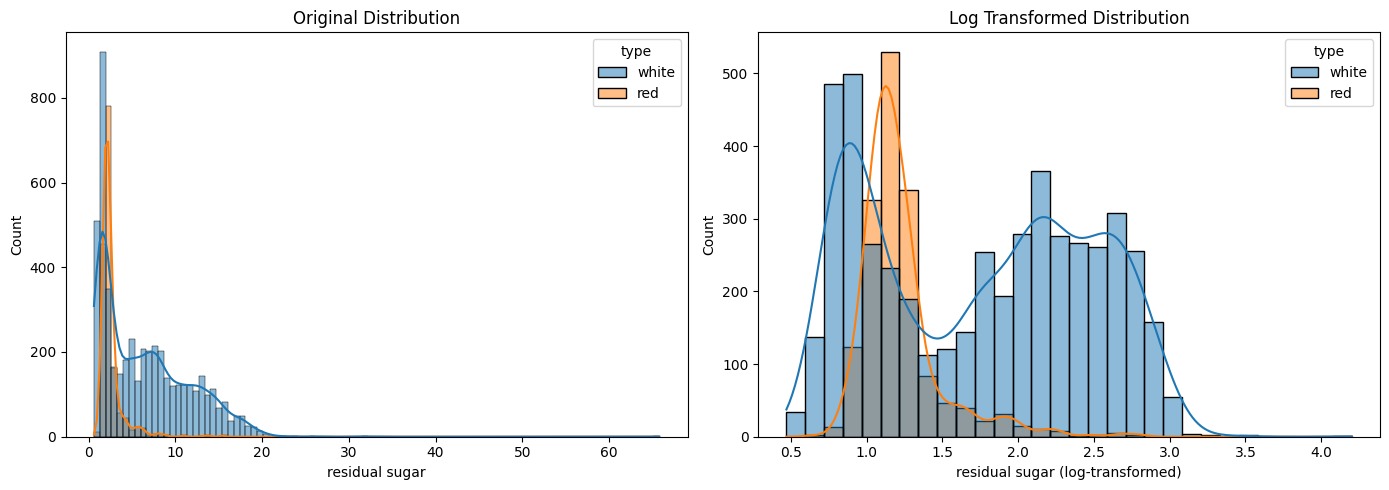

<Figure size 640x480 with 0 Axes>

In [33]:
# Histogram variations: Original vs Log
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# LEFT:
sns.histplot(data=wine, x='residual sugar', kde=True, hue='type',
            #  alpha=0.6,
             ax=axes[0])
axes[0].set_title('Original Distribution')
axes[0].set_xlabel('residual sugar')

# RIGHT:
import numpy as np

wine['residual_sugar_log'] = np.log1p(wine['residual sugar'])
sns.histplot(
    data=wine,
    x='residual_sugar_log',
    hue='type',
    kde=True,
    ax=axes[1]
)
axes[1].set_title('Log Transformed Distribution')
axes[1].set_xlabel('residual sugar (log-transformed)')

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

***Create new variables, such as combining pH and acidity to create an “acidity level” or grouping wines into categories based on sugar content.***

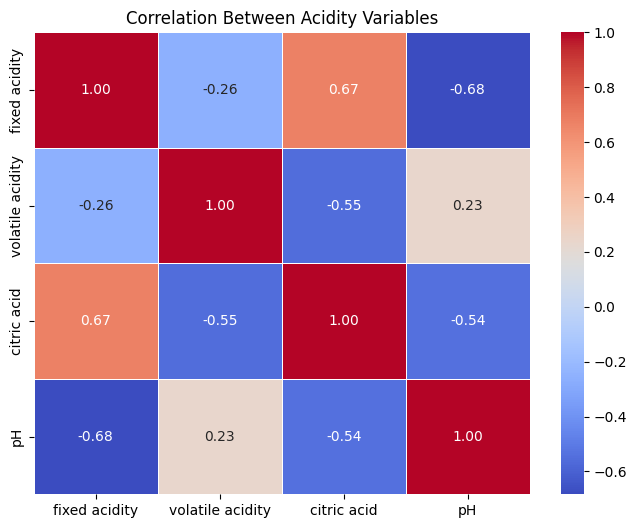

In [34]:
# Select acidity variables
acidity_vars = df[['fixed acidity', 'volatile acidity', 'citric acid', 'pH']]

# Calculate correlation matrix
corr = acidity_vars.corr()

# Plot heatmap
plt.figure(figsize=(8,6))

sns.heatmap(
    corr,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    linewidths=0.5
)

plt.title('Correlation Between Acidity Variables')
plt.show()


In [35]:
df['acidity_level'] = (
    df['fixed acidity'] -
    df['volatile acidity'] +
    df['citric acid'] -
    df['pH']
)


In [38]:
acidity_cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'pH']

scaler = StandardScaler()
scaled_acidity = scaler.fit_transform(df[acidity_cols])

df['acidity_level_scaled'] = scaled_acidity[:,0] - scaled_acidity[:,1] + scaled_acidity[:,2] - scaled_acidity[:,3]

df['acidity_category'] = pd.qcut(df['acidity_level'], 3, labels=['Low','Medium','High'])



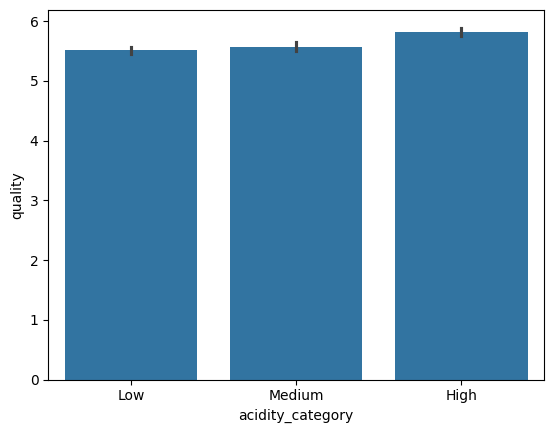

In [65]:

sns.barplot(data=df, x='acidity_category', y='quality')
plt.show()


In [57]:
def sugar_category(sugar):
    if sugar < 4:
        return 'Dry'
    elif sugar < 12:
        return 'Semi-Dry'
    elif sugar < 45:
        return 'Semi-Sweet'
    else:
        return 'Sweet'

wine['sugar_category'] = wine['residual sugar'].apply(sugar_category)
bin_max = wine['residual sugar'].max()
wine['sugar_category'] = pd.cut(
    wine['residual sugar'],
    bins=[0,4,12,45,bin_max],
    labels=['Dry','Semi-Dry','Semi-Sweet','Sweet']
)
print(bin_max)

65.8


In [59]:
print(wine[['residual sugar','sugar_category']].head())

print(wine['sugar_category'].value_counts())

   residual sugar sugar_category
0            20.7     Semi-Sweet
1             1.6            Dry
2             6.9       Semi-Dry
3             8.5       Semi-Dry
4             8.5       Semi-Dry
sugar_category
Dry           3571
Semi-Dry      2092
Semi-Sweet     833
Sweet            1
Name: count, dtype: int64


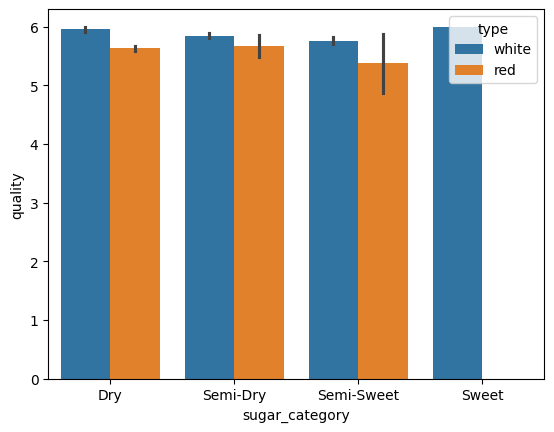

In [63]:

sns.barplot(data=wine, x='sugar_category', y='quality', hue='type')
plt.show()